In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import svm
from sklearn import linear_model as lm

In [46]:
DTrain = pd.read_csv("happiness-data-train.csv")
DTest = pd.read_csv("happiness-data-2015.csv")
DTrain.columns = [c.replace(' ', '_') for c in DTrain.columns]
DTest.columns = [c.replace(' ', '_') for c in DTest.columns]
DTrain.head()


,Country,Year,Code,Happiness,Happiness_Binary,PPP_per_capita,Unemployment_Percent,Political_Stability,Rule_of_Law,Voice_and_Accountability,Labor_force_female,Male_Life_Expectancy,Female_Life_Expectancy,MMR,Adolescent_fertility,Tuberculosis
0,Afghanistan,2014,700,3.131,0,1829.33,8.71,-2.411,-1.446,-1.135,18.490000,61.670,64.197,425,77.4586,189.0
1,Albania,2014,339,4.814,0,10700.54,17.49,0.486,-0.338,0.144,51.931000,75.974,80.124,29,20.7048,16.0
2,Argentina,2014,160,6.671,1,18797.55,7.27,-0.005,-0.886,0.345,54.856998,72.414,80.040,54,63.5016,25.0
3,Armenia,2014,371,4.453,0,7971.12,17.50,-0.297,-0.366,-0.562,57.974998,70.903,77.292,26,25.5950,57.0
4,Australia,2014,900,7.289,1,43547.20,6.07,1.032,1.923,1.362,70.510002,80.300,84.400,6,14.0414,6.5


In [47]:
clf = svm.SVC(kernel="linear") # Initializing a stock SVM using a RBF kernel
clf.fit(DTrain.iloc[0:,5:], DTrain.Happiness_Binary) # Training a stock SVM
happinessSVM = clf.predict(DTest.iloc[0:,5:]) # 0/1 prediction values for the SVM

mod = lm.LogisticRegression(penalty="l2", tol=0.01, 
                            C=1, fit_intercept=True, intercept_scaling=1, solver="liblinear", 
                            max_iter=10, multi_class="ovr", verbose=0, n_jobs=1)
mod.fit(DTrain.iloc[0:,5:], DTrain.Happiness_Binary) # Fitting to the data
happinessLR = mod.predict(DTest.iloc[0:,5:]) # 0/1 prediction values for logistic regression

R = pd.DataFrame.copy(DTest)
R['SVM'] = happinessSVM
R['LR'] = happinessLR
R.head()

,Country,Year,Code,Happiness,Happiness_Binary,PPP_per_capita,Unemployment_Percent,Political_Stability,Rule_of_Law,Voice_and_Accountability,Labor_force_female,Male_Life_Expectancy,Female_Life_Expectancy,MMR,Adolescent_fertility,Tuberculosis,SVM,LR
0,Afghanistan,2015,700,3.983,0,1802.05,8.86,-2.571,-1.504,-1.118,19.469000,62.046,64.613,396,73.1264,189.0,0,0
1,Albania,2015,339,4.607,0,10969.99,17.08,0.346,-0.328,0.157,55.665001,76.209,80.297,29,20.6922,16.0,0,1
2,Argentina,2015,160,6.697,1,19116.91,7.15,0.015,-0.771,0.412,55.279999,72.594,80.177,52,63.2644,25.0,1,1
3,Armenia,2015,371,4.348,0,8195.93,18.26,-0.252,-0.388,-0.536,57.180000,71.094,77.474,25,24.7850,50.0,0,0
4,Australia,2015,900,7.309,1,43923.26,6.06,0.885,1.825,1.356,71.236000,80.400,84.500,6,13.6616,6.1,1,1


In [48]:
print("Uniform Accuracy of SVM: ", np.sum(R.SVM==R.Happiness_Binary)/R.shape[0] )
print("Uniform Accuracy of Logistic Regression: ", np.sum(R.LR==R.Happiness_Binary)/R.shape[0] )

Uniform Accuracy of SVM:  0.8482142857142857
Uniform Accuracy of Logistic Regression:  0.7678571428571429


In [51]:
DTrain = pd.read_csv("happiness-data-sigVariables-train.csv")
DTest = pd.read_csv("happiness-data-sigVariables-2015.csv")
DTrain.columns = [c.replace(' ', '_') for c in DTrain.columns]
DTest.columns = [c.replace(' ', '_') for c in DTest.columns]
DTrain.head()

,Country,Year,Code,Regime_Type,Region,Continent,Happiness,Binary_Happiness,PPP_per_capita,Unemployment_Percent,Health_expenditure,Male_Life_Expectancy,Adolescent_fertility
0,Afghanistan,2014,700,Authoritarian,Southern Asia,Asia,3.131,0,1829.33,8.71,9.652356,61.670,77.4586
1,Argentina,2014,160,Flawed democracy,Latin America and Caribbean,South America,6.671,1,18797.55,7.27,6.407625,72.414,63.5016
2,Armenia,2014,371,Hybrid regime,Central and Eastern Europe,Europe,4.453,0,7971.12,17.50,7.041526,70.903,25.5950
3,Australia,2014,900,Full democracy,Australia and New Zealand,Pacific,7.289,1,43547.20,6.07,9.079250,80.300,14.0414
4,Austria,2014,305,Full democracy,Western Europe,Europe,6.950,1,44320.50,5.62,10.285970,79.100,7.8360


In [52]:
clf = svm.SVC(kernel="linear") # Initializing a stock SVM using a RBF kernel
clf.fit(DTrain.iloc[0:,8:], DTrain.Binary_Happiness) # Training a stock SVM
happinessSVM = clf.predict(DTest.iloc[0:,8:]) # 0/1 prediction values for the SVM

mod = lm.LogisticRegression(penalty="l2", tol=0.01, 
                            C=1, fit_intercept=True, intercept_scaling=1, solver="liblinear", 
                            max_iter=10, multi_class="ovr", verbose=0, n_jobs=1)
mod.fit(DTrain.iloc[0:,8:], DTrain.Binary_Happiness) # Fitting to the data
happinessLR = mod.predict(DTest.iloc[0:,8:]) # 0/1 prediction values for logistic regression

R = pd.DataFrame.copy(DTest)
R['SVM'] = happinessSVM
R['LR'] = happinessLR
R.head()

,Country,Year,Code,Regime_Type,Region,Continent,Happiness,Binary_Happiness,PPP_per_capita,Unemployment_Percent,Health_expenditure,Male_Life_Expectancy,Adolescent_fertility,SVM,LR
0,Afghanistan,2015,700,Authoritarian,Southern Asia,Asia,3.983,0,1802.05,8.86,10.297590,62.046,73.1264,0,1
1,Argentina,2015,160,Flawed democracy,Latin America and Caribbean,South America,6.697,1,19116.91,7.15,6.834533,72.594,63.2644,1,1
2,Armenia,2015,371,Hybrid regime,Central and Eastern Europe,Europe,4.348,0,8195.93,18.26,10.140840,71.094,24.7850,0,1
3,Australia,2015,900,Full democracy,Australia and New Zealand,Pacific,7.309,1,43923.26,6.06,9.445333,80.400,13.6616,1,1
4,Austria,2015,305,Full democracy,Western Europe,Europe,7.076,1,44304.97,5.72,10.319880,78.800,7.5220,1,1


In [53]:
print("Uniform Accuracy of SVM: ", np.sum(R.SVM==R.Binary_Happiness)/R.shape[0] )
print("Uniform Accuracy of Logistic Regression: ", np.sum(R.LR==R.Binary_Happiness)/R.shape[0] )

Uniform Accuracy of SVM:  0.8828828828828829
Uniform Accuracy of Logistic Regression:  0.5135135135135135


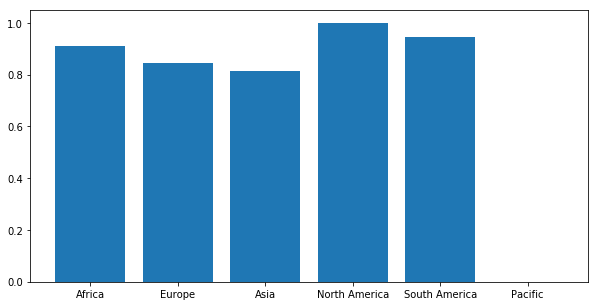

[0.9117647058823529, 0.8461538461538461, 0.8125, 1.0, 0.9444444444444444, 0.0]


In [54]:
numAfrica = R[R.Continent=="Africa"].shape[0]
numSA = R[R.Continent=="South America"].shape[0]
numEurope = R[R.Continent=="Europe"].shape[0]
numAsia = R[R.Continent=="Asia"].shape[0]
numNA = R[R.Continent=="North America"].shape[0]
numPacific = R[R.Continent=="Pacific"].shape[0]


AccSVM =[R[(R.Binary_Happiness == R.SVM)  & (R.Continent=="Africa")].shape[0]/numAfrica, 
         R[(R.Binary_Happiness == R.SVM)  & (R.Continent=="Europe")].shape[0]/numEurope,
         R[(R.Binary_Happiness == R.SVM)  & (R.Continent=="Asia")].shape[0]/numAsia,
         R[(R.Binary_Happiness == R.SVM)  & (R.Continent=="North America")].shape[0]/numNA,
         R[(R.Binary_Happiness == R.SVM)  & (R.Continent=="South America")].shape[0]/numSA,
         R[(R.Binary_Happiness == R.SVM)  & (R.Continent=="Pacific America")].shape[0]/numPacific]

plt.figure(figsize=(10, 5))
plt.bar(x=range(6), height=AccSVM, align='center')
plt.xticks(range(6), ('Africa', 'Europe',
                    'Asia', 'North America', 'South America','Pacific'))
plt.show()

print(AccSVM)

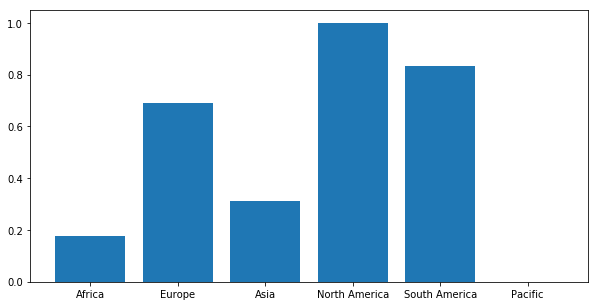

[0.17647058823529413, 0.6923076923076923, 0.3125, 1.0, 0.8333333333333334, 0.0]


In [56]:
AccLR =[R[(R.Binary_Happiness == R.LR)  & (R.Continent=="Africa")].shape[0]/numAfrica, 
         R[(R.Binary_Happiness == R.LR)  & (R.Continent=="Europe")].shape[0]/numEurope,
         R[(R.Binary_Happiness == R.LR)  & (R.Continent=="Asia")].shape[0]/numAsia,
         R[(R.Binary_Happiness == R.LR)  & (R.Continent=="North America")].shape[0]/numNA,
         R[(R.Binary_Happiness == R.LR)  & (R.Continent=="South America")].shape[0]/numSA,
         R[(R.Binary_Happiness == R.LR)  & (R.Continent=="Pacific America")].shape[0]/numPacific]

plt.figure(figsize=(10, 5))
plt.bar(x=range(6), height=AccLR, align='center')
plt.xticks(range(6), ('Africa', 'Europe',
                    'Asia', 'North America', 'South America','Pacific'))
plt.show()

print(AccLR)

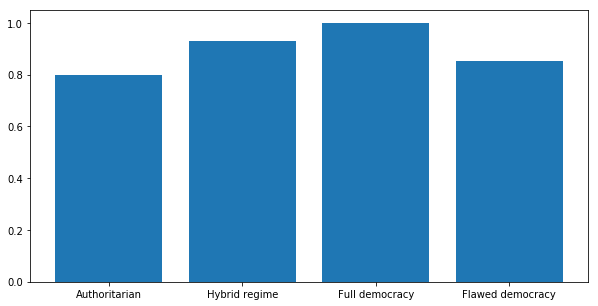

[0.8, 0.9310344827586207, 1.0, 0.8536585365853658]


In [57]:
numAutho = R[R.Regime_Type=="Authoritarian"].shape[0]
numHD = R[R.Regime_Type=="Hybrid regime"].shape[0]
numFullD = R[R.Regime_Type=="Full democracy"].shape[0]
numFlawedD = R[R.Regime_Type=="Flawed democracy"].shape[0]


AccSVM =[R[(R.Binary_Happiness == R.SVM)  & (R.Regime_Type=="Authoritarian")].shape[0]/numAutho, 
         R[(R.Binary_Happiness == R.SVM)  & (R.Regime_Type=="Hybrid regime")].shape[0]/numHD,
         R[(R.Binary_Happiness == R.SVM)  & (R.Regime_Type=="Full democracy")].shape[0]/numFullD,
         R[(R.Binary_Happiness == R.SVM)  & (R.Regime_Type=="Flawed democracy")].shape[0]/numFlawedD]

plt.figure(figsize=(10, 5))
plt.bar(x=range(4), height=AccSVM, align='center')
plt.xticks(range(4), ('Authoritarian', 'Hybrid regime', 'Full democracy', 'Flawed democracy'))
plt.show()

print(AccSVM)

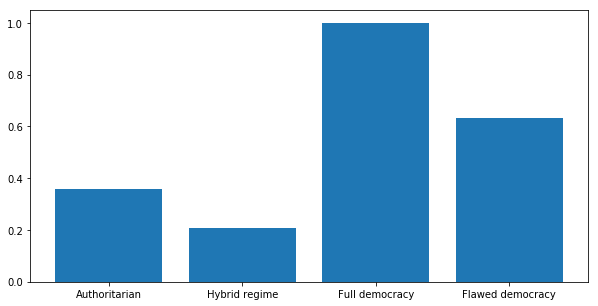

[0.36, 0.20689655172413793, 1.0, 0.6341463414634146]


In [60]:
AccLR =[R[(R.Binary_Happiness == R.LR)  & (R.Regime_Type=="Authoritarian")].shape[0]/numAutho, 
         R[(R.Binary_Happiness == R.LR)  & (R.Regime_Type=="Hybrid regime")].shape[0]/numHD,
         R[(R.Binary_Happiness == R.LR)  & (R.Regime_Type=="Full democracy")].shape[0]/numFullD,
         R[(R.Binary_Happiness == R.LR)  & (R.Regime_Type=="Flawed democracy")].shape[0]/numFlawedD]

plt.figure(figsize=(10, 5))
plt.bar(x=range(4), height=AccLR, align='center')
plt.xticks(range(4), ('Authoritarian', 'Hybrid regime', 'Full democracy', 'Flawed democracy'))
plt.show()

print(AccLR)